### Modelo Clasificacion Arbol de Desicion

Es Arbol de Decision pero para Clasificacion (lo anterior era Regresion)

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [82]:
df=pd.read_csv(r'C:\Users\carolina\Desktop\FormDataAnalyst\Modelos\clasificacion_arbol_de_decision.csv')

In [83]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [84]:
df.shape

(400, 3)

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [86]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


TENGO YA COMPROBADA LA RELACION DE EDAD Y SALARIO CON LA VARIABLE OBJETIVO COMPRA. PROCEDEMOS A LA ELABORACION DE MODELO.

#### Dummys y Missing no hay

In [87]:
df.isnull().value_counts()

Age    EstimatedSalary  Purchased
False  False            False        400
dtype: int64

#### Seleccion de variables

Utilizaremos las dos variables (edad y salario)

In [88]:
y=df.iloc[:,2].values

In [89]:
x=df.iloc[:,[0,1]].values

#### Separacion training/test

In [90]:
from sklearn.model_selection import train_test_split

In [91]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1987)

#### Normalizacion/estandarizacion en este modelo SI que hay que hacerlo.

In [92]:
from sklearn.preprocessing import StandardScaler

In [93]:
sc_x=StandardScaler()
x_train=sc_x.fit_transform(x_train)
x_test=sc_x.fit_transform(x_test)

#### Crear el modelo de Clasificacion Arbol Decisión


* Parametros:

    - criterion: “gini”, “entropía”, “log_loss”. Por defecto ”gini”. Criterios para medir la calidad de la division.
    - random_state: semilla 
    - splitter: best/random. Por defecto Best
    - max_depth: profundidad (para no sobreparametrizar si hay muchas variables se puede poner 5 o 6)
    - min_samples_split:minimo numero de muestras para crear cada una de las ramas. Por defecto 2. Puede ser 10 o 15.
    - min_weight_fraction_leaf: minimo peso para constriur las ramas.
    - max_features: maximo de caracteristicas si tenemos muchas variables. Ej 13 o 15
    - max_leaf_node: maximo numero de nodos. Determinara tambien la profundidad.
      
    

In [94]:
from sklearn.tree import DecisionTreeClassifier   # en esta libreria estan el DecisionTree Regresor y Classifier

In [95]:
clasificador=DecisionTreeClassifier(criterion='entropy', random_state=1987)
clasificador.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=1987)

#### Prediccion

In [96]:
clasificador.predict(x_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1], dtype=int64)

##### Evaluacion del modelo mediante matriz de confusion o contingencia

In [97]:
from sklearn.metrics import confusion_matrix

In [98]:
matriz_conf=confusion_matrix(y_test, clasificador.predict(x_test))
matriz_conf  # Total 120 (400*0.3)

array([[69,  6],
       [15, 30]], dtype=int64)

In [99]:
# Metricas de la matriz

## Funcion de evaluacion
def Evaluacion_ClasificacionRL(matriz_conting):
    precision_precision=matriz_conf[0,0]/(matriz_conf[0,0]+matriz_conf[0,1])
    accuracy_exactitud=(matriz_conf[0,0]+matriz_conf[1,1])/matriz_conf.sum()
    specifity_especificidad=matriz_conf[1,1]/(matriz_conf[1,1]+matriz_conf[0,1])
    recall_sensibilidad=matriz_conf[0,0]/(matriz_conf[0,0]+matriz_conf[1,0])
    f1_score=2*precision_precision*recall_sensibilidad/(precision_precision+recall_sensibilidad)
    print(f"Precision: {precision_precision:.2f}\nExactitud: {accuracy_exactitud:.2f}\nEspecificidad: {specifity_especificidad:.2f}\nSensibilidad: {recall_sensibilidad:.2f}\nPuntuación F1: {f1_score:.2f}")
    

In [100]:
Evaluacion_ClasificacionRL(matriz_conf)

Precision: 0.92
Exactitud: 0.82
Especificidad: 0.83
Sensibilidad: 0.82
Puntuación F1: 0.87


Exactitid del 82%. Quiza haya algo de sobreajuste.

#### Visualizacion del Modelo

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


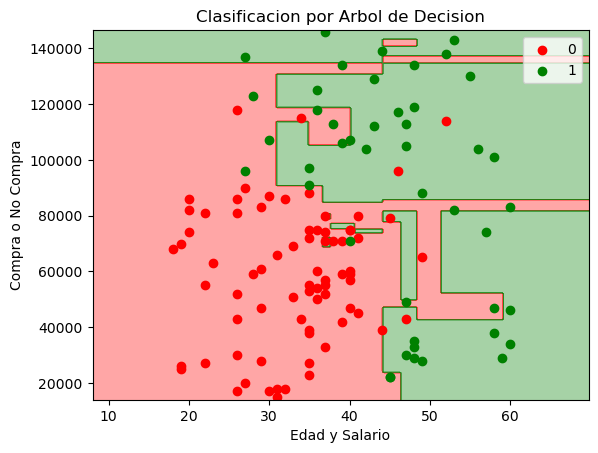

In [101]:
from matplotlib.colors import ListedColormap 
x_set, y_set = sc_x.inverse_transform(x_test), y_test
x1,x2=np.meshgrid(np.arange(start=x_set[:,0].min()-10, stop = x_set[:,0].max()+10, step=0.25), np.arange(start=x_set[:,1].min()-1000, stop=x_set[:,1].max()+1000, step=500)) # coord x e y
plt.contourf(x1,x2,clasificador.predict(sc_x.transform(np.array([x1.ravel(),x2.ravel()]).T)).reshape(x1.shape),alpha=0.35,cmap=ListedColormap(('red','green'))) # ravel() aplana la matriz
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0], x_set[y_set==j,1], c = ListedColormap(('red','green'))(i),label=j)
plt.title('Clasificacion por Arbol de Decision')
plt.xlabel('Edad y Salario')
plt.ylabel('Compra o No Compra')
plt.legend()
plt.show()

Lo que se visualiza son los datos de la regresion. 

Se ve que esta sobreparametrizado. Este modelo no sirve. No se ajusta bien. Se podria cambiar el modelo con otros parametros para intentar mejorar pero lo mas practico es pasar a otros modelos.
